In [1]:
import importlib
import numpy as np
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from src.object_detection import get_bounding_boxes_dino
from src import bbox_utils
importlib.reload(bbox_utils)
from src import hand_search
importlib.reload(hand_search)
from src import scene_process

In [2]:
scene_dir = Path("./data/hammer_1/scenes")

In [ ]:

scene_process.process_scenes(scene_dir, "hammer")

I0000 00:00:1745505521.906520  108839 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745505521.909355  109678 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) UHD Graphics 630 (CFL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1745505521.972888  109662 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745505521.999429  109666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745505522.156774  109661 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


No hands detected.
No hand bounding box found for hammer in data/hammer_2/scenes/hold_hammer_012732.jpg.
Skipping data/hammer_2/scenes/hold_hammer_012732.jpg due to no bounding boxes found.
No bounding boxes found for hammer in data/hammer_2/scenes/hold_hammer_000202.jpg.
Skipping data/hammer_2/scenes/hold_hammer_000202.jpg due to no bounding boxes found.
No bounding boxes found for hammer in data/hammer_2/scenes/hold_hammer_005814.jpg.
Skipping data/hammer_2/scenes/hold_hammer_005814.jpg due to no bounding boxes found.
No hands detected.
No hand bounding box found for hammer in data/hammer_2/scenes/hold_hammer_005574.jpg.
Skipping data/hammer_2/scenes/hold_hammer_005574.jpg due to no bounding boxes found.


In [3]:
render_iter = scene_dir.glob("*.npz")
path_list= list(render_iter)
len(path_list)

4

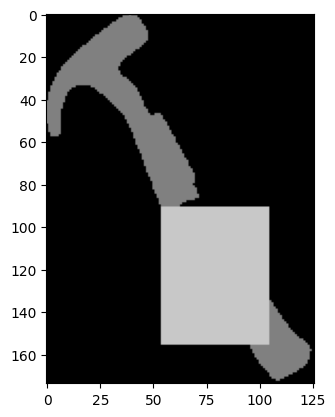

In [6]:
scene_results = np.load(path_list[1])
hand_bbox = scene_results["hand_bbox"]
object_mask = scene_results["image"]
image = bbox_utils.add_bbox_to_image(object_mask, hand_bbox)
bbox = bbox_utils.get_total_bounding_box(image, background_white=False)
croped_image_scene = bbox_utils.crop_bbox_cv2(image, bbox)
plt.imshow(croped_image_scene)
plt.savefig("./assets/reasult.png")